# La régression linéaire multiple sur le jeu de données de l'ozone

On va modéliser le pic d'ozone journalier en fonction de toutes les autres variables météorologiques.

## Import des librairies et des données

Les variables :
- MaxO3, qui est la valeur maximale d'ozone observée sur une journée ;
- T9, T12 et T15 qui sont les températures prises respectivement à 9 h, 12 h et 15 h ;
- Ne9, Ne12, Ne15 qui sont des nébulosités prises à 9 h, 12 h et 15 h ;
- Vx9, Vx12 et Vx15 qui sont les composantes est-ouest du vent mesurées à 9 h, 12 h et 15 h ;
- MaxO3V, qui donne la teneur maximale en ozone observée la veille ;
- vent, l'orientation du vent à 12 h ;
- pluie, la présence ou non de pluie.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

On importe les données, puis on utilise la commande  lm  pour régresser maxO3 en fonction des autres variables de l'échantillon.

In [2]:
ozone = pd.read_csv('data/ozone.txt', sep=";", decimal=',')
#ozone.drop('obs', axis=1, inplace=True)
ozone

,obs,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
0,601,87,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84,Nord,Sec
1,602,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87,Nord,Sec
2,603,92,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82,Est,Sec
3,604,114,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92,Nord,Sec
4,605,94,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114,Ouest,Sec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,925,84,13.3,17.7,17.8,3,5,6,0.0000,-1.0000,-1.2856,76,Sud,Sec
108,927,77,16.2,20.8,22.1,6,5,5,-0.6946,-2.0000,-1.3681,71,Sud,Pluie
109,928,99,16.9,23.0,22.6,6,4,7,1.5000,0.8682,0.8682,77,Sud,Sec
110,929,83,16.9,19.8,22.1,6,5,3,-4.0000,-3.7588,-4.0000,99,Ouest,Pluie


## Quelques visualisations

In [3]:
ozone.corr(numeric_only=True)

,obs,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
obs,1.000000,-0.223712,-0.267973,-0.165728,-0.152408,0.109832,0.159809,0.128487,-0.081878,0.060228,0.126651,-0.255413
maxO3,-0.223712,1.000000,0.699387,0.784262,0.774570,-0.621704,-0.640751,-0.478302,0.527623,0.430796,0.391899,0.684516
T9,-0.267973,0.699387,1.000000,0.882967,0.846446,-0.483864,-0.472248,-0.325139,0.250690,0.222386,0.170322,0.582245
T12,-0.165728,0.784262,0.882967,1.000000,0.946193,-0.584271,-0.660100,-0.458099,0.430104,0.312629,0.270680,0.563629
T15,-0.152408,0.774570,0.846446,0.946193,1.000000,-0.586168,-0.649226,-0.574682,0.453089,0.343751,0.286603,0.567889
Ne9,0.109832,-0.621704,-0.483864,-0.584271,-0.586168,1.000000,0.788341,0.550249,-0.497636,-0.528775,-0.493901,-0.276550
Ne12,0.159809,-0.640751,-0.472248,-0.660100,-0.649226,0.788341,1.000000,0.709867,-0.492658,-0.510320,-0.432269,-0.361923
Ne15,0.128487,-0.478302,-0.325139,-0.458099,-0.574682,0.550249,0.709867,1.000000,-0.401472,-0.431863,-0.378290,-0.308475
Vx9,-0.081878,0.527623,0.250690,0.430104,0.453089,-0.497636,-0.492658,-0.401472,1.000000,0.750177,0.682261,0.340317
Vx12,0.060228,0.430796,0.222386,0.312629,0.343751,-0.528775,-0.510320,-0.431863,0.750177,1.000000,0.837172,0.223675


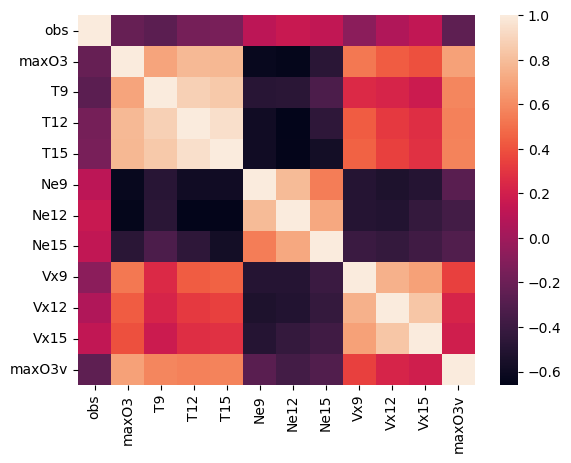

In [4]:
# corrélations
sns.heatmap(ozone.corr(numeric_only=True));

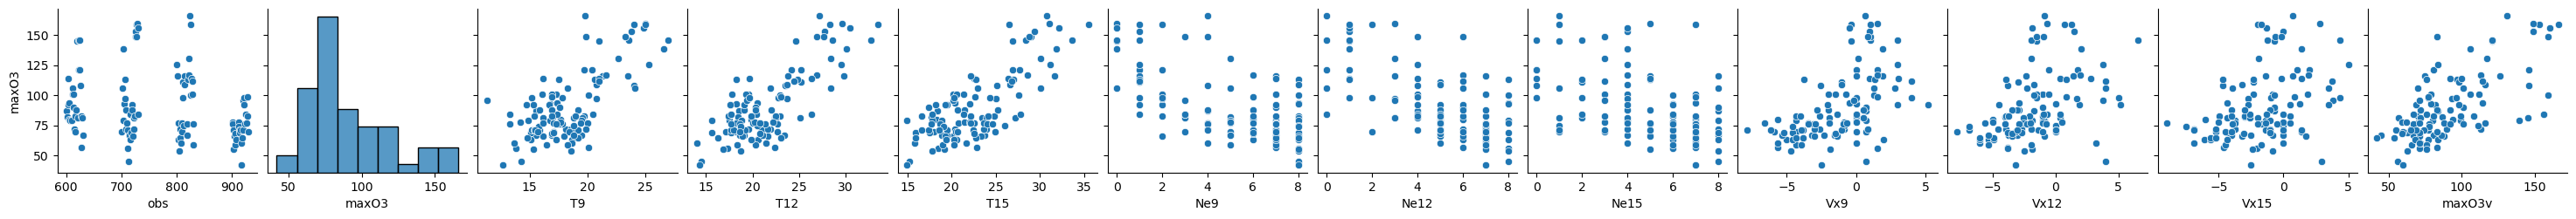

In [5]:
# Les croisements entre max03 et variables numériques
sns.pairplot(ozone, y_vars=['maxO3']);

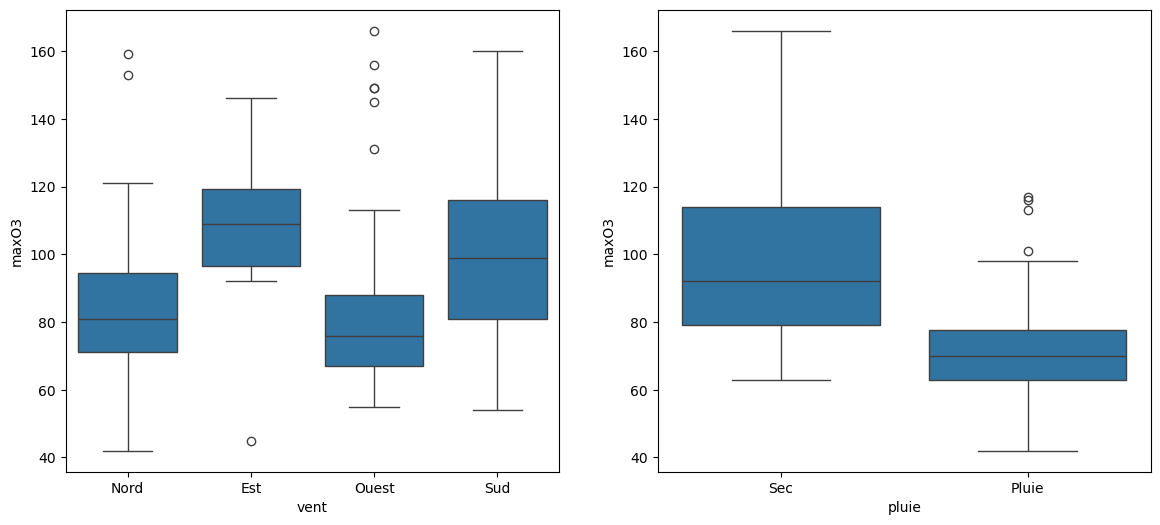

In [6]:
# Les croisements max03 et variables catégorielles
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
sns.boxplot(data=ozone, y='maxO3', x='vent', ax=ax1)
sns.boxplot(data=ozone, y='maxO3', x='pluie',ax=ax2);

## Gestion des variables catégorielles

In [7]:
ozone = pd.concat((ozone.drop('pluie', axis=1), pd.get_dummies(ozone.pluie, drop_first=True)), axis=1)
ozone = pd.concat((ozone.drop('vent', axis=1), pd.get_dummies(ozone.vent, drop_first=True)), axis=1)
ozone

,obs,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,Sec,Nord,Ouest,Sud
0,601,87,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84,True,True,False,False
1,602,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87,True,True,False,False
2,603,92,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82,True,False,False,False
3,604,114,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92,True,True,False,False
4,605,94,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,925,84,13.3,17.7,17.8,3,5,6,0.0000,-1.0000,-1.2856,76,True,False,False,True
108,927,77,16.2,20.8,22.1,6,5,5,-0.6946,-2.0000,-1.3681,71,False,False,False,True
109,928,99,16.9,23.0,22.6,6,4,7,1.5000,0.8682,0.8682,77,True,False,False,True
110,929,83,16.9,19.8,22.1,6,5,3,-4.0000,-3.7588,-4.0000,99,False,False,True,False


## Régression linéaire multiple

### Avec toutes les variables explicatives

In [8]:
lr = smf.ols('maxO3~T9+T12+T15+Ne9+Ne12+Ne15+Vx9+Vx12+Vx15+maxO3v+Sec+Nord+Ouest+Sud', data=ozone).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     23.01
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           8.74e-25
Time:                        16:21:20   Log-Likelihood:                -450.42
No. Observations:                 112   AIC:                             930.8
Df Residuals:                      97   BIC:                             971.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        16.2654     15.944      1.020

Certaines p-value ne sont pas inférieures à 0.05 donc cela signifie que les coefficients ne sont pas significativement différents de zéro. On va les retirer une à une.

### Choix des variables

On va donc retirer les variables non significatives en commançant par la moins significative.

In [9]:
# sans Ne15
lr = smf.ols('maxO3~T9+T12+T15+Ne9+Ne12+Vx9+Vx12+Vx15+maxO3v+Sec+Nord+Ouest+Sud', data=ozone).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     25.03
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.70e-25
Time:                        16:21:20   Log-Likelihood:                -450.42
No. Observations:                 112   AIC:                             928.8
Df Residuals:                      98   BIC:                             966.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        16.2305     15.724      1.032

In [10]:
# sans T9
lr = smf.ols('maxO3~T12+T15+Ne9+Ne12+Vx9+Vx12+Vx15+maxO3v+Sec+Nord+Ouest+Sud', data=ozone).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     27.40
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           3.17e-26
Time:                        16:21:20   Log-Likelihood:                -450.42
No. Observations:                 112   AIC:                             926.8
Df Residuals:                      99   BIC:                             962.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        16.2184     15.640      1.037

In [11]:
# sans Nord
lr = smf.ols('maxO3~T12+T15+Ne9+Ne12+Vx9+Vx12+Vx15+maxO3v+Sec+Ouest+Sud', data=ozone).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     30.19
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           5.63e-27
Time:                        16:21:20   Log-Likelihood:                -450.42
No. Observations:                 112   AIC:                             924.8
Df Residuals:                     100   BIC:                             957.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        16.7660     13.921      1.204

In [12]:
# sans Vx12
lr = smf.ols('maxO3~T12+T15+Ne9+Ne12+Vx9+Vx15+maxO3v+Sec+Ouest+Sud', data=ozone).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     33.46
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.03e-27
Time:                        16:21:20   Log-Likelihood:                -450.52
No. Observations:                 112   AIC:                             923.0
Df Residuals:                     101   BIC:                             952.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        16.9667     13.856      1.225

In [13]:
# sans T15
lr = smf.ols('maxO3~T12+Ne9+Ne12+Vx9+Vx15+maxO3v+Sec+Ouest+Sud', data=ozone).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     37.40
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.88e-28
Time:                        16:21:20   Log-Likelihood:                -450.69
No. Observations:                 112   AIC:                             921.4
Df Residuals:                     102   BIC:                             948.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.6669     13.748      1.285

In [14]:
# sans Ne12
lr = smf.ols('maxO3~T12+Ne9+Vx9+Vx15+maxO3v+Sec+Ouest+Sud', data=ozone).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     42.32
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           3.26e-29
Time:                        16:21:20   Log-Likelihood:                -450.86
No. Observations:                 112   AIC:                             919.7
Df Residuals:                     103   BIC:                             944.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.4874     11.574      1.165

In [15]:
# sans Ouest
lr = smf.ols('maxO3~T12+Ne9+Vx9+Vx15+maxO3v+Sec+Sud', data=ozone).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     48.34
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           6.64e-30
Time:                        16:21:20   Log-Likelihood:                -451.29
No. Observations:                 112   AIC:                             918.6
Df Residuals:                     104   BIC:                             940.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.9180     11.428      1.043      

In [16]:
# sans Sud
lr = smf.ols('maxO3~T12+Ne9+Vx9+Vx15+maxO3v+Sec', data=ozone).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     56.74
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           9.67e-31
Time:                        16:21:20   Log-Likelihood:                -451.44
No. Observations:                 112   AIC:                             916.9
Df Residuals:                     105   BIC:                             935.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.9764     11.251      0.976      

In [17]:
# sans Vx15
lr = smf.ols('maxO3~T12+Ne9+Vx9+maxO3v+Sec', data=ozone).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     68.30
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.43e-31
Time:                        16:21:20   Log-Likelihood:                -451.72
No. Observations:                 112   AIC:                             915.4
Df Residuals:                     106   BIC:                             931.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.4664     11.035      1.130      

In [18]:
# sans Sec
lr = smf.ols('maxO3~T12+Ne9+Vx9+maxO3v', data=ozone).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     85.75
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.76e-32
Time:                        16:21:20   Log-Likelihood:                -451.93
No. Observations:                 112   AIC:                             913.9
Df Residuals:                     107   BIC:                             927.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.6313     11.001      1.148      0.2

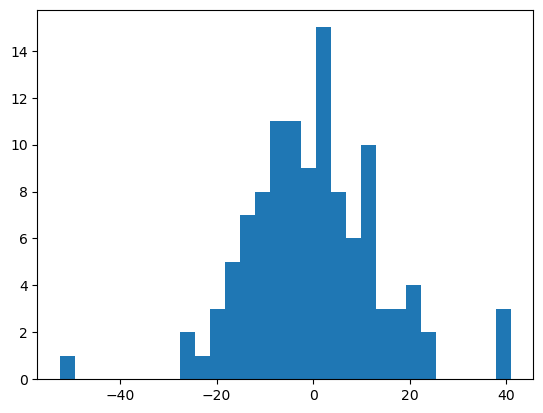

In [19]:
plt.hist(lr.resid,bins=30);

## Approche alternative

Vu les résultats précédents, on pourrait imaginer que ce qui compte c'est finalement la température maximale et la nébulosité moyenne mais uniquement le matin (la nébulosité à 15h n'était pas du tout significative dans la première régression). On va introduire ces mesures et tester.

In [21]:
ozone = pd.read_csv('data/ozone.txt', sep=";", decimal=',')
ozone['maxT'] = ozone[['T9','T12','T15']].max(axis=1)
ozone['moyNe'] = ozone[['Ne9','Ne12']].mean(axis=1)
ozone

,obs,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie,maxT,moyNe
0,601,87,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84,Nord,Sec,18.5,4.0
1,602,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87,Nord,Sec,18.4,5.0
2,603,92,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82,Est,Sec,19.5,3.5
3,604,114,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92,Nord,Sec,22.5,1.0
4,605,94,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114,Ouest,Sec,20.5,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,925,84,13.3,17.7,17.8,3,5,6,0.0000,-1.0000,-1.2856,76,Sud,Sec,17.8,4.0
108,927,77,16.2,20.8,22.1,6,5,5,-0.6946,-2.0000,-1.3681,71,Sud,Pluie,22.1,5.5
109,928,99,16.9,23.0,22.6,6,4,7,1.5000,0.8682,0.8682,77,Sud,Sec,23.0,5.0
110,929,83,16.9,19.8,22.1,6,5,3,-4.0000,-3.7588,-4.0000,99,Ouest,Pluie,22.1,5.5


In [22]:
lr = smf.ols('maxO3~maxT+Ne9+Vx9+maxO3v', data=ozone).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     84.77
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           2.81e-32
Time:                        16:21:42   Log-Likelihood:                -452.42
No. Observations:                 112   AIC:                             914.8
Df Residuals:                     107   BIC:                             928.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.1286     10.793      1.402      0.1

In [23]:
lr = smf.ols('maxO3~T12+moyNe+Vx9+maxO3v', data=ozone).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     84.40
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           3.35e-32
Time:                        16:21:43   Log-Likelihood:                -452.61
No. Observations:                 112   AIC:                             915.2
Df Residuals:                     107   BIC:                             928.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.8261     12.354      1.443      0.1

In [24]:
lr = smf.ols('maxO3~maxT+moyNe+Vx9+maxO3v', data=ozone).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     84.07
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           3.93e-32
Time:                        16:21:43   Log-Likelihood:                -452.78
No. Observations:                 112   AIC:                             915.6
Df Residuals:                     107   BIC:                             929.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.6595     11.965      1.727      0.0